# Dependencies loading

In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter, LogLocator

In [369]:
import warnings
warnings.filterwarnings("ignore")

# Data preparation

## Data loading

In [370]:
BTC_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/Bitcoin_daily.csv'
SP500_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/S&P500.csv'
TMUBMUSD01Y_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/TMUBMUSD01Y.csv'

df_BTC = pd.read_csv(BTC_url)
df_BTC.columns = df_BTC.columns.str.strip()

df_SP500 = pd.read_csv(SP500_url)
df_SP500.columns = df_SP500.columns.str.strip()

df_TMUBMUSD01Y = pd.read_csv(TMUBMUSD01Y_url)
df_TMUBMUSD01Y.columns = df_TMUBMUSD01Y.columns.str.strip()

## Dataset adjustment

In [371]:
# Select Columns
df_SP500 = df_SP500[['Date', 'Close']].rename(columns={'Close': 'Price'})
df_BTC = df_Bitcoin[['Date', 'Price']]
df_TMUBMUSD01Y = df_TMUBMUSD01Y[['Date', 'Close']].rename(columns={'Close': 'Price'})

########################################################################################

# Define Price as 'numeric'

df_SP500['Price'] = df_SP500['Price'].astype(str)
df_BTC['Price'] = df_BTC['Price'].astype(str)
df_TMUBMUSD01Y['Price'] = df_TMUBMUSD01Y['Price'].astype(str)

df_SP500['Price'] = pd.to_numeric(df_SP500['Price'].str.replace(',', ''), errors='coerce')
df_BTC['Price'] = pd.to_numeric(df_BTC['Price'].str.replace(',', ''), errors='coerce')
df_TMUBMUSD01Y['Price'] = pd.to_numeric(df_TMUBMUSD01Y['Price'].str.replace(',', ''), errors='coerce')

########################################################################################

# Date
df_SP500['Date'] = pd.to_datetime(df_SP500['Date'])
df_SP500.set_index('Date', inplace=True)

df_BTC['Date'] = pd.to_datetime(df_Bitcoin['Date'])
df_BTC.set_index('Date', inplace=True)

df_TMUBMUSD01Y['Date'] = pd.to_datetime(df_TMUBMUSD01Y['Date'])
df_TMUBMUSD01Y.set_index('Date', inplace=True)

# Sort by Date
df_SP500.sort_index(inplace=True)
df_BTC.sort_index(inplace=True)
df_TMUBMUSD01Y.sort_index(inplace=True)

# Define dates
start_date = '2014-05-01'
end_date = '2024-04-30'

df_SP500 = df_SP500.loc[start_date:end_date]
df_BTC = df_BTC.loc[start_date:end_date] # Cryptocurrency market is open on weekends
df_TMUBMUSD01Y = df_TMUBMUSD01Y.loc[start_date:end_date]

########################################################################################

#print(df_SP500.head())
#print(df_SP500.tail()) 
#print(df_TMUBMUSD01Y.head())
#print(df_TMUBMUSD01Y.tail())
#print(df_BTC.head())
#print(df_BTC.tail())

# Exploratory Data Analysis

### Price Changes of the S&P 500 Index, Bitcoin, and the 1-Year U.S. Treasury Bond

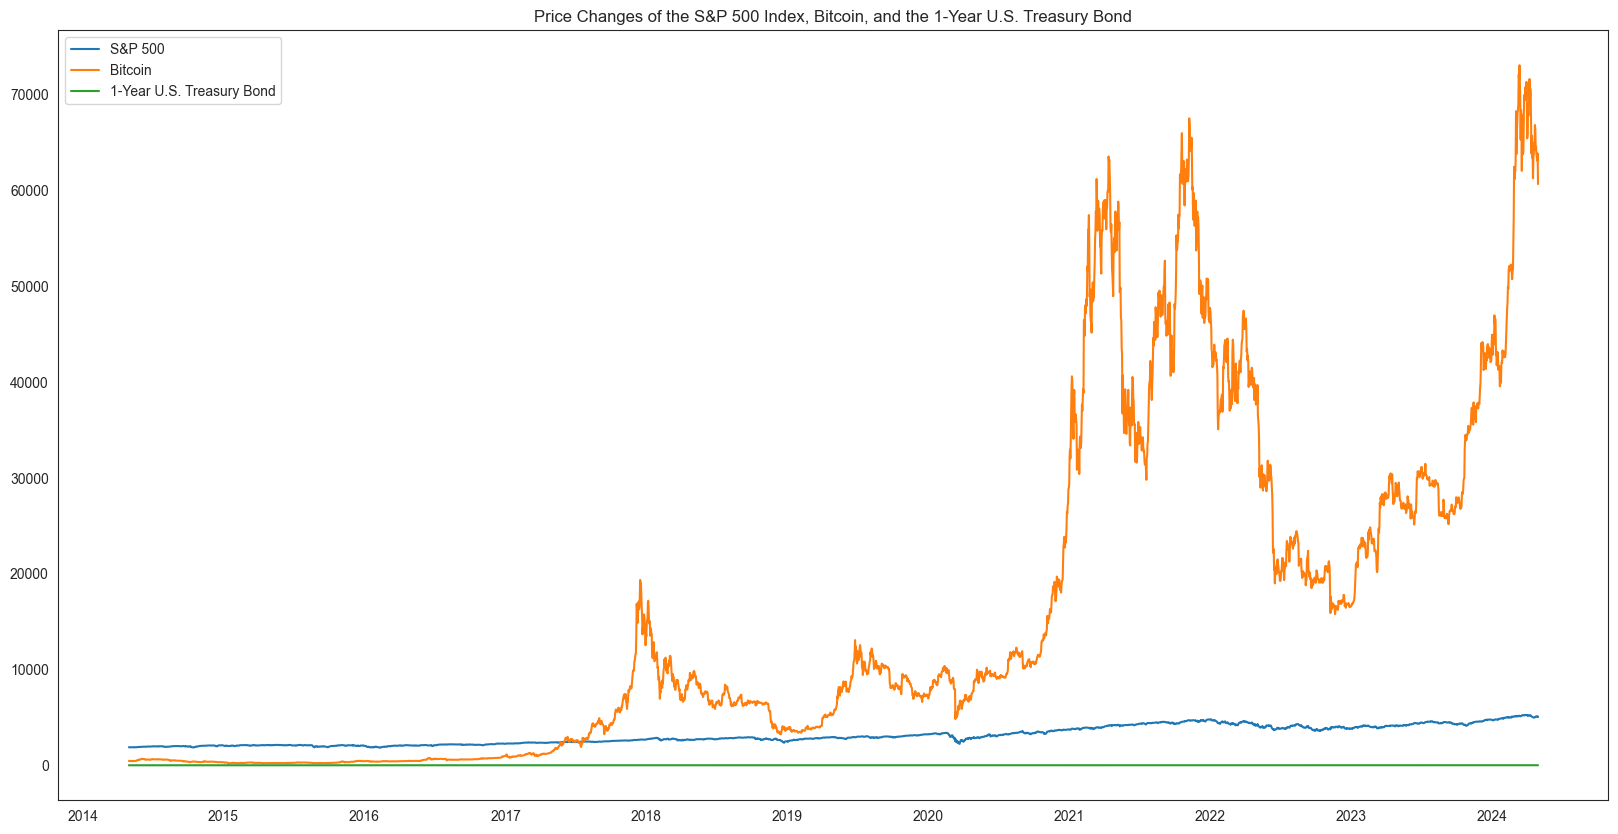

In [416]:
plt.figure(figsize=(20, 10))

plt.plot(df_SP500.index, df_SP500['Price'], label='S&P 500')
plt.plot(df_BTC.index, df_BTC['Price'], label='Bitcoin')
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Price'], label='1-Year U.S. Treasury Bond')

plt.xlabel('')
plt.ylabel('')
plt.title('Price Changes of the S&P 500 Index, Bitcoin, and the 1-Year U.S. Treasury Bond')
plt.legend()
plt.grid(False)
plt.show()

#### S&P 500 Index

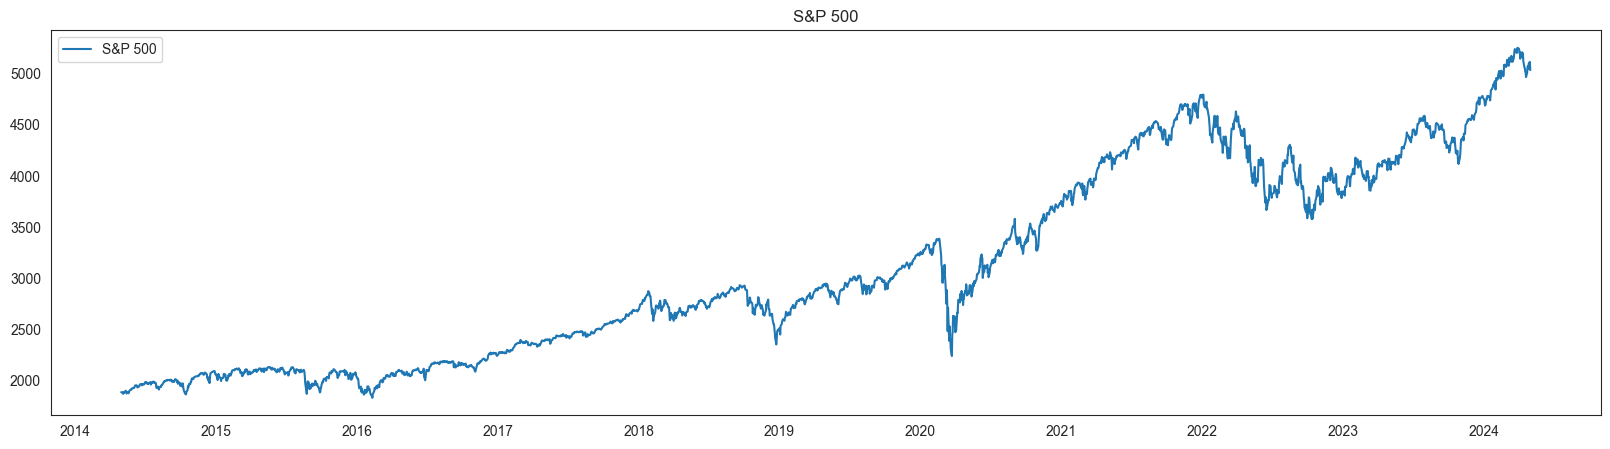

In [415]:
plt.figure(figsize=(20, 5))
plt.plot(df_SP500.index, df_SP500['Price'], label='S&P 500')
plt.xlabel('')
plt.ylabel('')
plt.title('S&P 500')
plt.legend()
plt.grid(False)
plt.show()

### Bitcoin

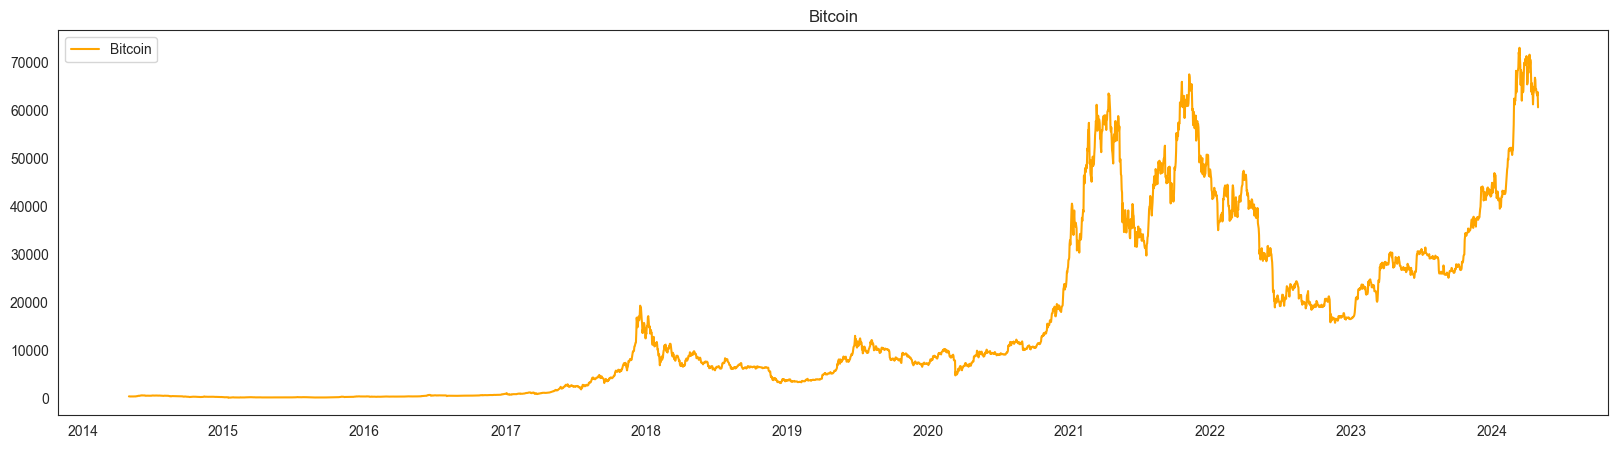

In [414]:
plt.figure(figsize=(20, 5))
plt.plot(df_BTC.index, df_BTC['Price'], label='Bitcoin', color='orange')
plt.xlabel('')
plt.ylabel('')
plt.title('Bitcoin')
plt.legend()
plt.grid(False)
plt.show()

### 1-Year U.S. Treasury Bond

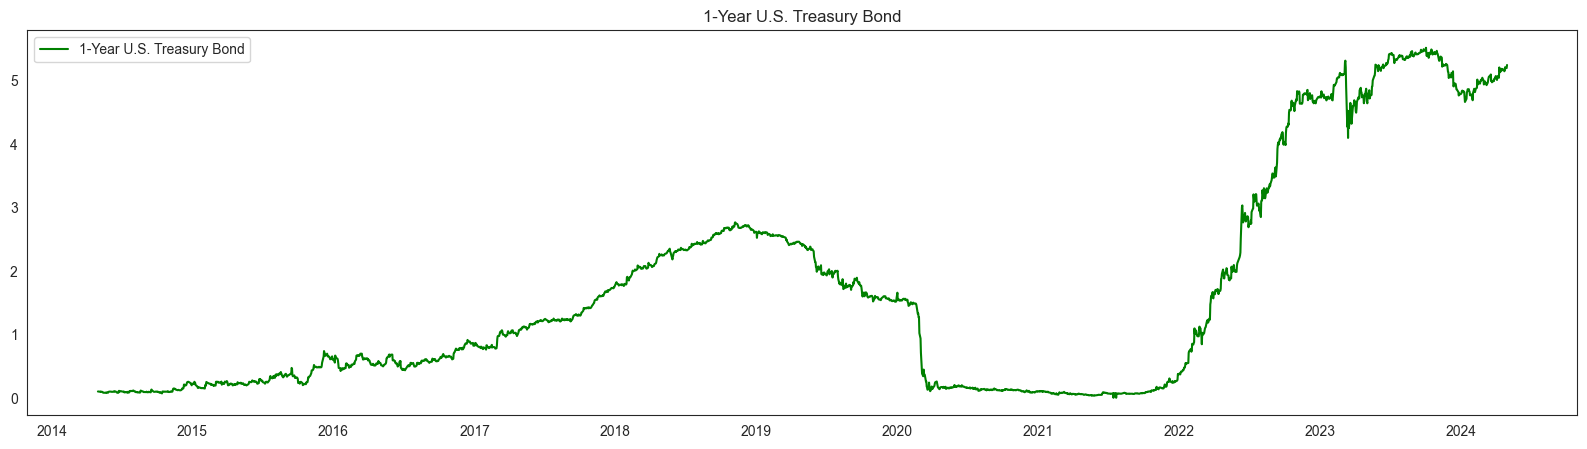

In [413]:
plt.figure(figsize=(20, 5))
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Price'], label='1-Year U.S. Treasury Bond', color='green')
plt.xlabel('')
plt.ylabel('')
plt.title('1-Year U.S. Treasury Bond')
plt.legend()
plt.grid(False)
plt.show()

## Daily Returns

In [421]:
df_SP500['Return'] = df_SP500['Price'].pct_change() * 100
df_BTC['Return'] = df_BTC['Price'].pct_change() * 100
df_TMUBMUSD01Y['Return'] = df_TMUBMUSD01Y['Price'].pct_change() * 100

#print(df_SP500.head())
#print(df_TMUBMUSD01Y.head())
#print(df_BTC.head())

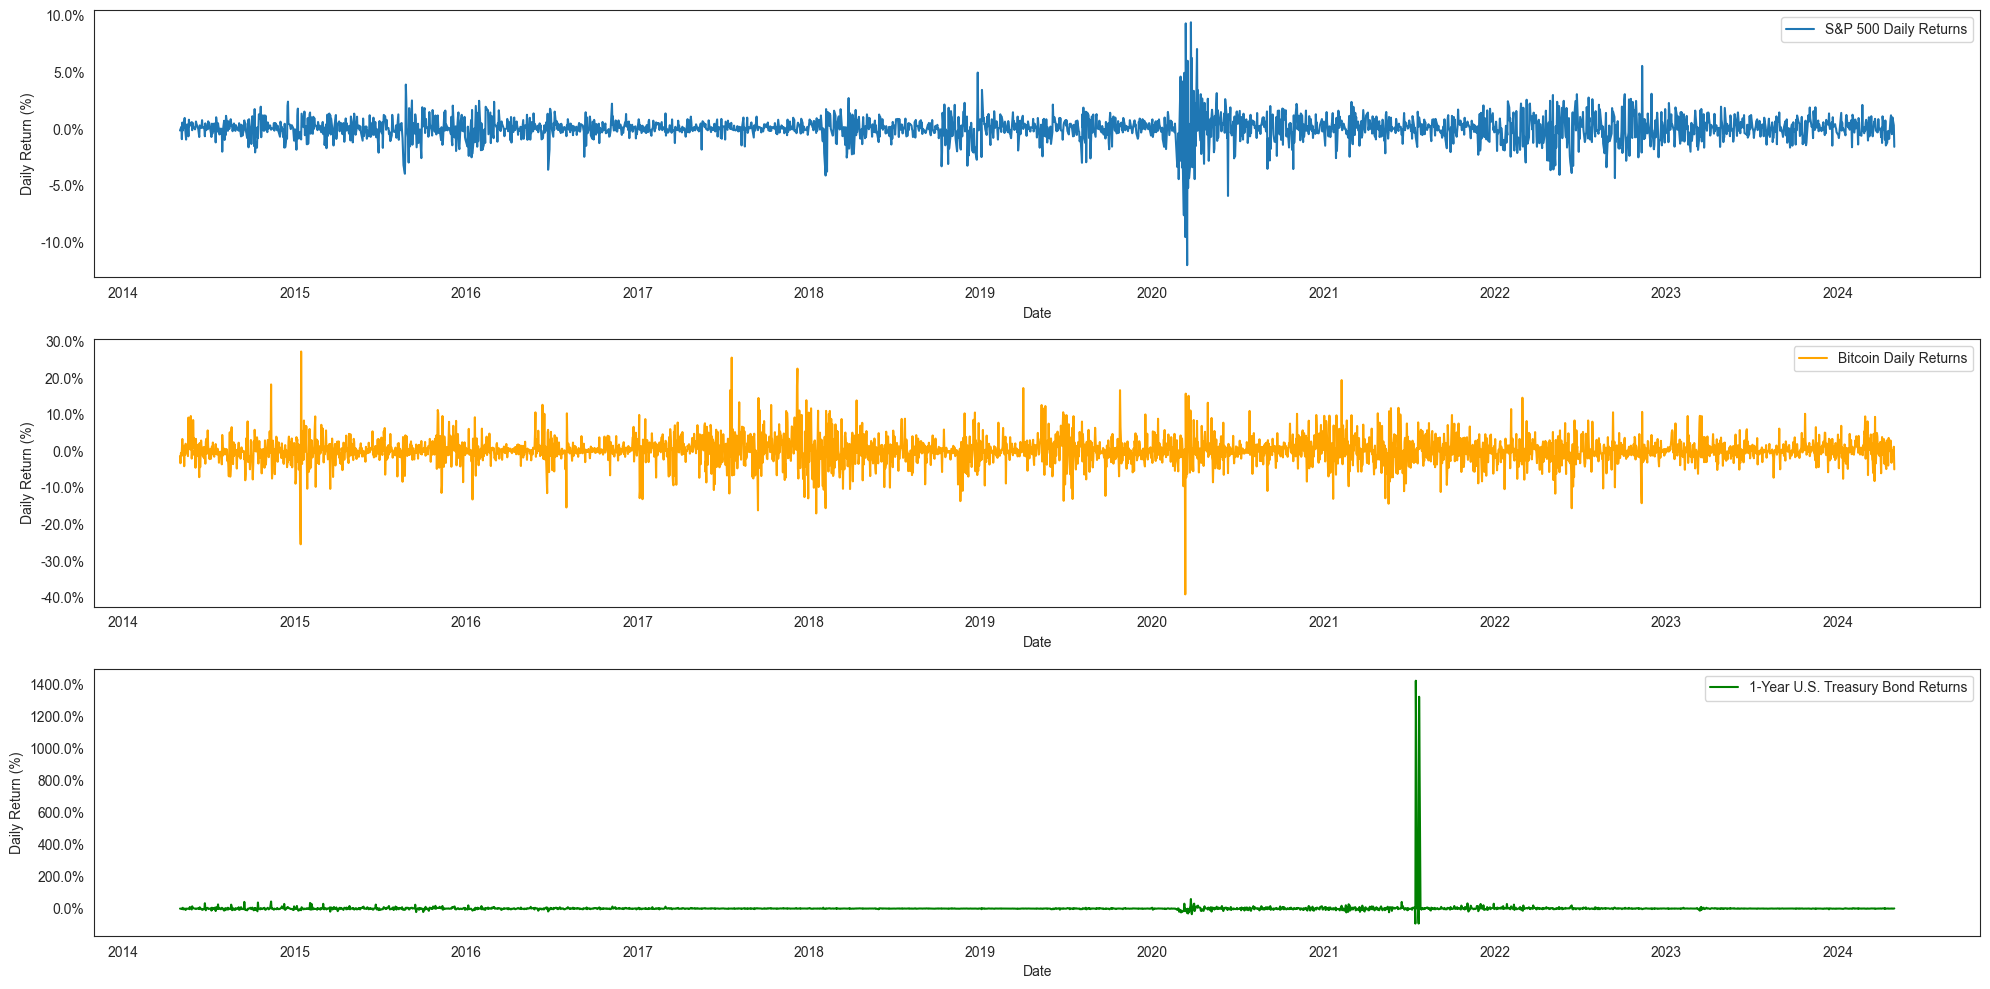

In [389]:
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(df_SP500.index, df_SP500['Return'], label='S&P 500 Daily Returns')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_BTC.index, df_BTC['Return'], label='Bitcoin Daily Returns', color='orange')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Return'], label='1-Year U.S. Treasury Bond Returns', color='green')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.tight_layout()
plt.show()

In [432]:
# Merge files
df_assets = pd.merge(df_SP500, df_BTC, on='Date', how='outer')
df_assets = pd.merge(df_assets, df_TMUBMUSD01Y, on='Date', how='outer')

df_assets.columns = ['SP500_Price', 'SP500_Return', 'BTC_Price', 'BTC_Return', 'TMUBMUSD01Y_Price', 'TMUBMUSD01Y_Return']
df_assets = df_merged.fillna("")

#print(df_assets.head())